### <center> My Workbook - Project Python M203 </center>

#### Package Import

In [1]:
from project_python_203.Data_treatment import *
from pybacktestchain.data_module import *
from pybacktestchain.broker import *
from project_python_203.Trades import *

#### Range of date and universe

In [3]:
#tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA', 'NVDA', 'INTC', 'CSCO', 'NFLX']
tickers = ['AAPL', 'MSFT']
start_date = '2010-01-01'
end_date = '2015-01-01'
data = get_stocks_data(tickers, start_date, end_date)
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,ticker
0,2010-01-04 00:00:00-05:00,7.622500,7.660714,7.585000,7.643214,6.447412,493729600,AAPL
1,2010-01-05 00:00:00-05:00,7.664286,7.699643,7.616071,7.656429,6.458560,601904800,AAPL
2,2010-01-06 00:00:00-05:00,7.656429,7.686786,7.526786,7.534643,6.355826,552160000,AAPL
3,2010-01-07 00:00:00-05:00,7.562500,7.571429,7.466071,7.520714,6.344077,477131200,AAPL
4,2010-01-08 00:00:00-05:00,7.510714,7.571429,7.466429,7.570714,6.386256,447610800,AAPL


In [4]:
data_module = DataModule(data)

#Information : 
info = Information(s = timedelta(data_module.data.size/len(tickers)), data_module=data_module)
info

Information(s=datetime.timedelta(days=10064), data_module=DataModule(data=                          Date       Open       High        Low      Close  \
0    2010-01-04 00:00:00-05:00   7.622500   7.660714   7.585000   7.643214   
1    2010-01-05 00:00:00-05:00   7.664286   7.699643   7.616071   7.656429   
2    2010-01-06 00:00:00-05:00   7.656429   7.686786   7.526786   7.534643   
3    2010-01-07 00:00:00-05:00   7.562500   7.571429   7.466071   7.520714   
4    2010-01-08 00:00:00-05:00   7.510714   7.571429   7.466429   7.570714   
...                        ...        ...        ...        ...        ...   
1253 2014-12-24 00:00:00-05:00  48.639999  48.639999  48.080002  48.139999   
1254 2014-12-26 00:00:00-05:00  48.410000  48.410000  47.820000  47.880001   
1255 2014-12-29 00:00:00-05:00  47.700001  47.779999  47.259998  47.450001   
1256 2014-12-30 00:00:00-05:00  47.439999  47.619999  46.840000  47.020000   
1257 2014-12-31 00:00:00-05:00  46.730000  47.439999  46.450001  46.

In [5]:
data_treatment = Data_treatment(data)

In [6]:
MVA = data_treatment.compute_moving_average(short_window=20, long_window=100)
MVA

,Date,Adj Close,Volume,ticker,Short_MA,Long_MA
0,2010-01-04 00:00:00-05:00,6.447412,493729600,AAPL,NaN,NaN
1,2010-01-05 00:00:00-05:00,6.458560,601904800,AAPL,NaN,NaN
2,2010-01-06 00:00:00-05:00,6.355826,552160000,AAPL,NaN,NaN
3,2010-01-07 00:00:00-05:00,6.344077,477131200,AAPL,NaN,NaN
4,2010-01-08 00:00:00-05:00,6.386256,447610800,AAPL,NaN,NaN
...,...,...,...,...,...,...
1253,2014-12-24 00:00:00-05:00,41.420238,11437800,MSFT,40.938824,39.657996
1254,2014-12-26 00:00:00-05:00,41.196514,13197800,MSFT,40.944416,39.703905
1255,2014-12-29 00:00:00-05:00,40.826546,14439500,MSFT,40.928929,39.749004
1256,2014-12-30 00:00:00-05:00,40.456562,16384700,MSFT,40.860096,39.786239


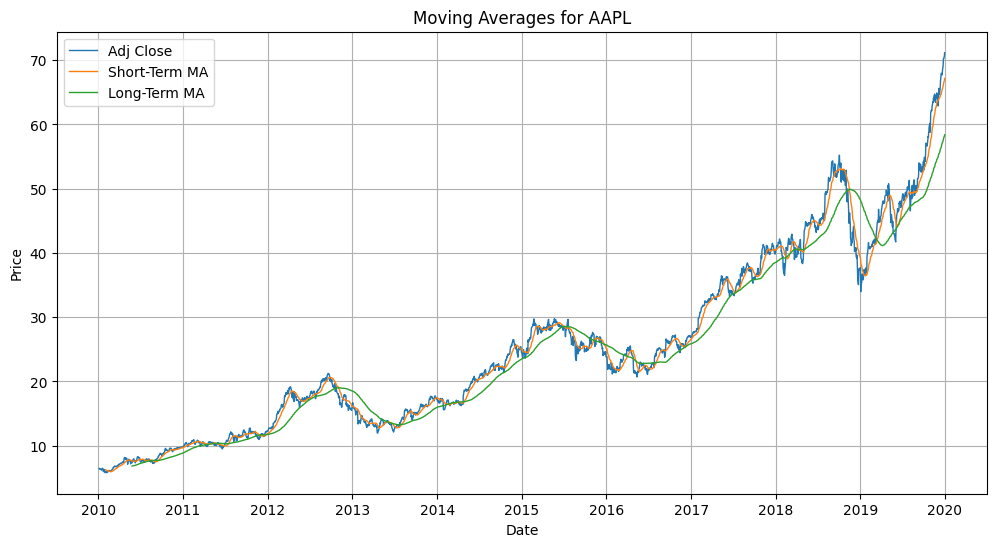

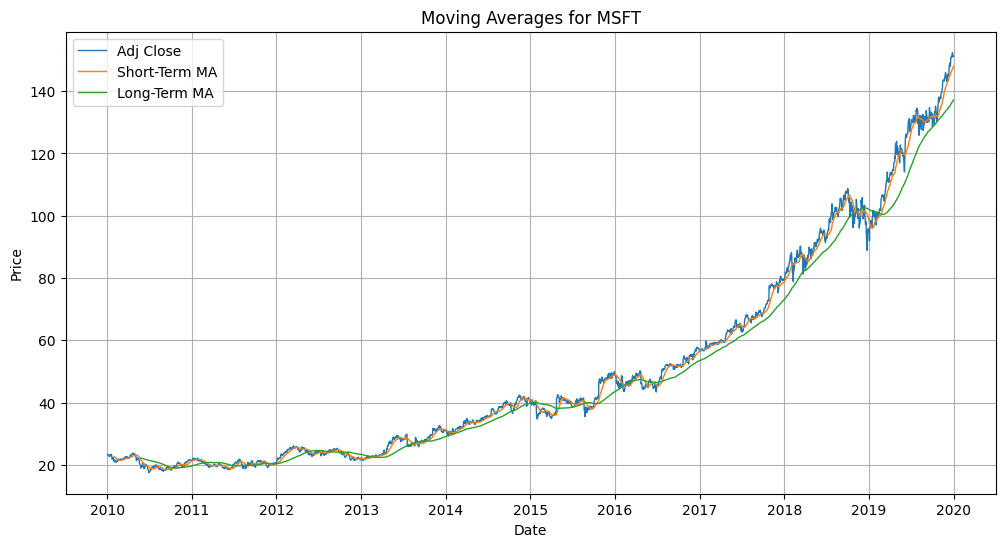

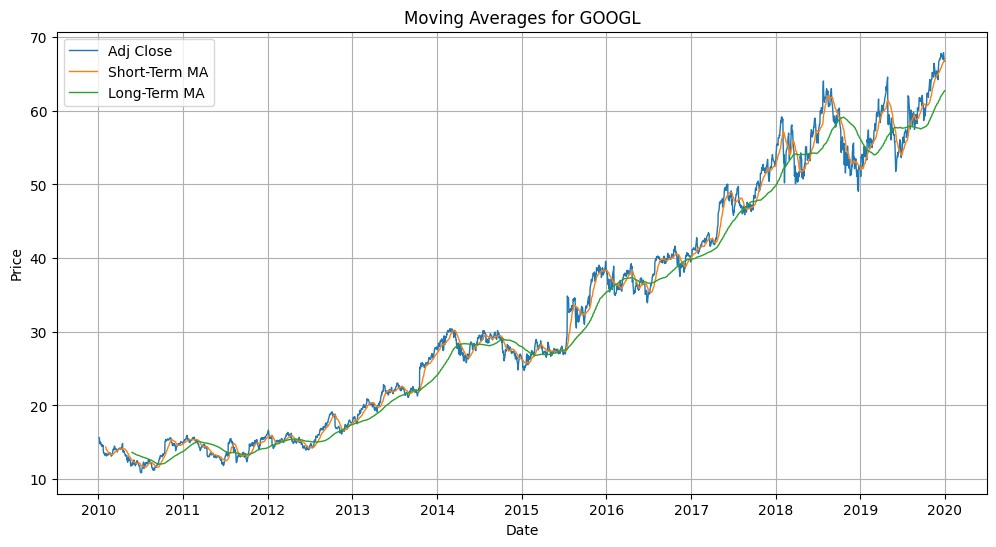

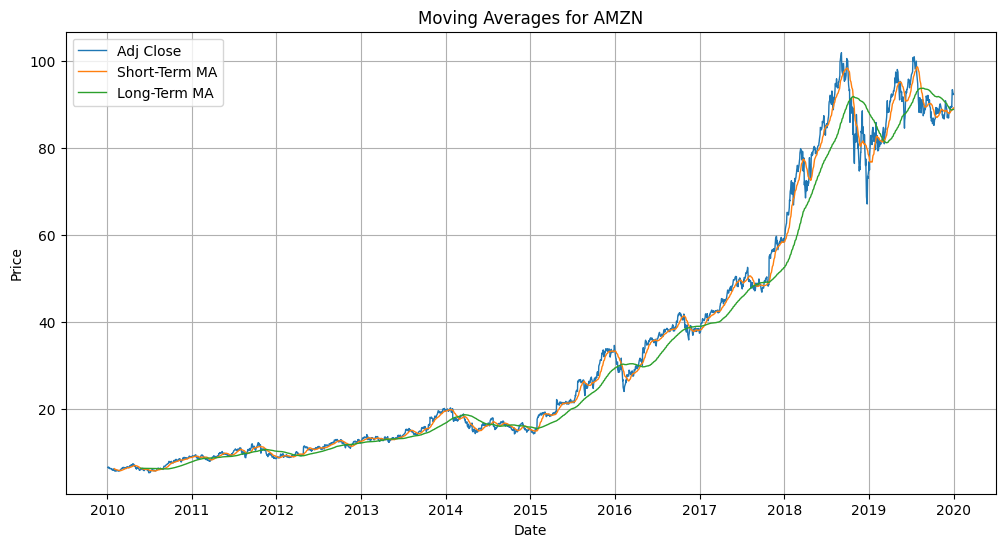

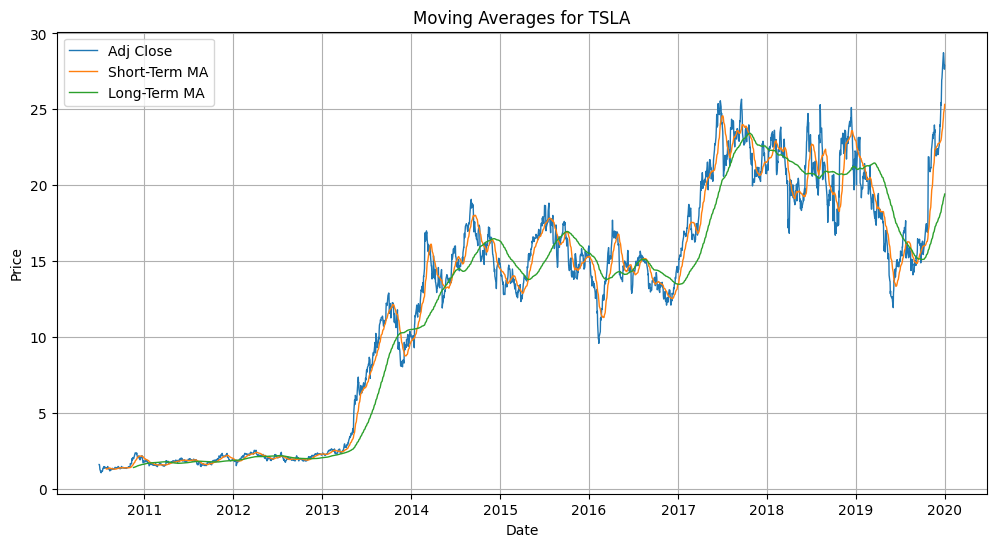

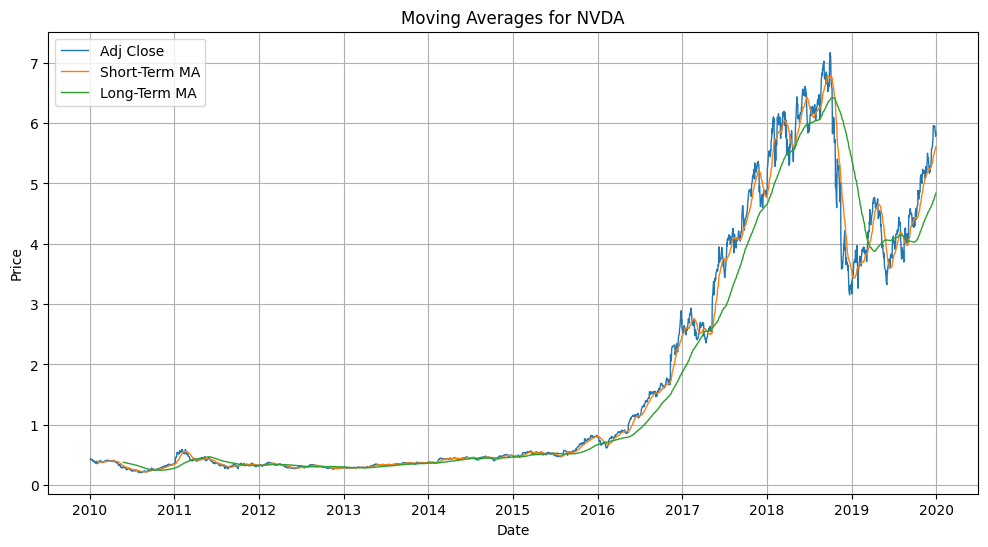

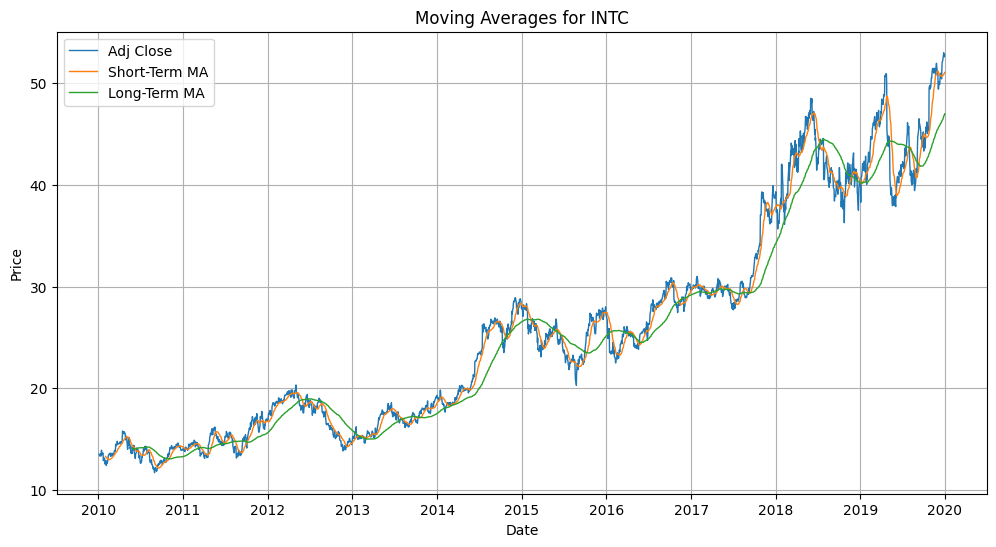

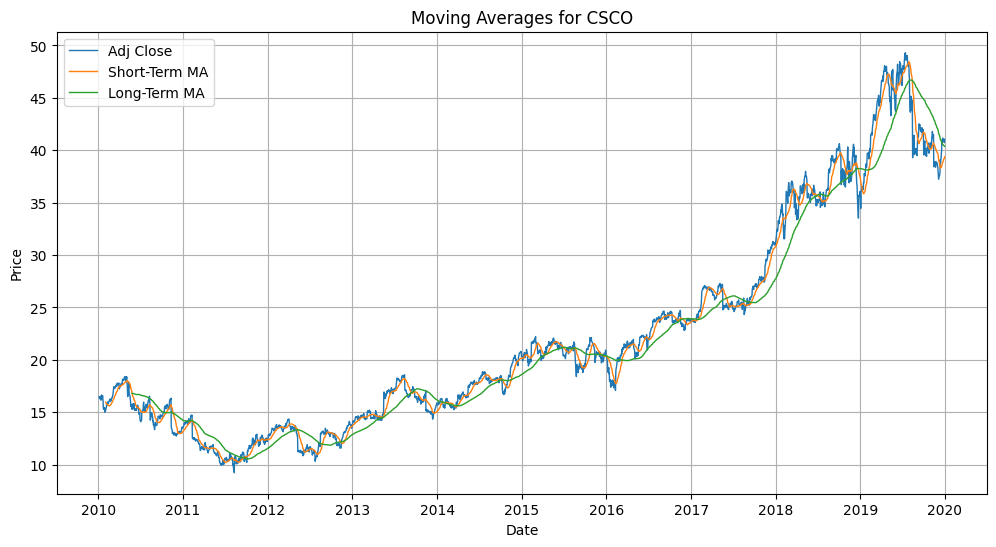

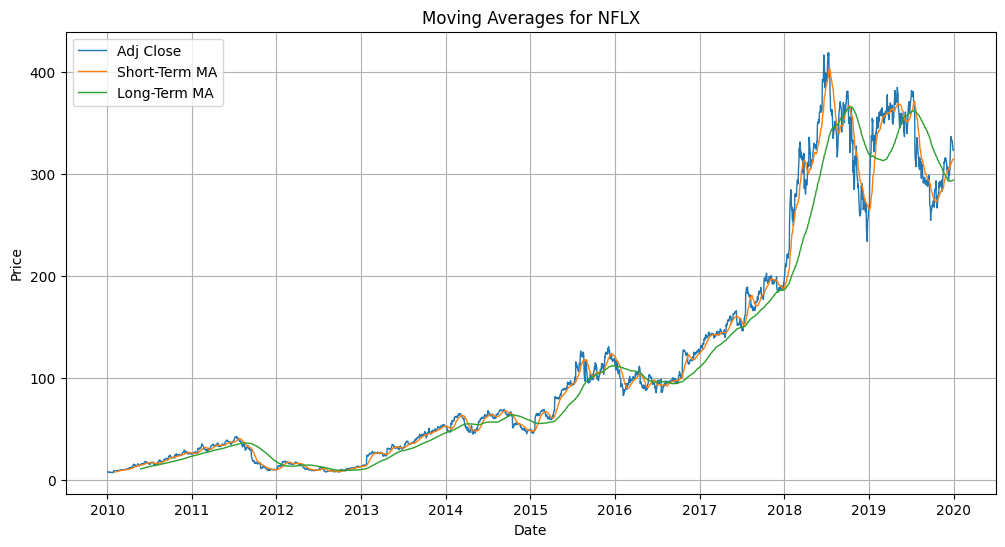

In [6]:
for ticker in tickers:
    data_treatment.plot_moving_average(ticker)

In [7]:
data_treatment

Data_treatment(data=                          Date       Open       High        Low      Close  \
0    2010-01-04 00:00:00-05:00   7.622500   7.660714   7.585000   7.643214   
1    2010-01-05 00:00:00-05:00   7.664286   7.699643   7.616071   7.656429   
2    2010-01-06 00:00:00-05:00   7.656429   7.686786   7.526786   7.534643   
3    2010-01-07 00:00:00-05:00   7.562500   7.571429   7.466071   7.520714   
4    2010-01-08 00:00:00-05:00   7.510714   7.571429   7.466429   7.570714   
...                        ...        ...        ...        ...        ...   
2389 2019-12-24 00:00:00-05:00  27.890667  28.364668  27.512667  28.350000   
2390 2019-12-26 00:00:00-05:00  28.527332  28.898666  28.423332  28.729334   
2391 2019-12-27 00:00:00-05:00  29.000000  29.020666  28.407333  28.691999   
2392 2019-12-30 00:00:00-05:00  28.586000  28.600000  27.284000  27.646667   
2393 2019-12-31 00:00:00-05:00  27.000000  28.086000  26.805332  27.888666   

      Adj Close     Volume ticker   Short_M

trading Strategies 

In [7]:
Trading_strat = TradingStrategy(MVA)
Trading_strat

TradingStrategy(data_MA=                          Date  Adj Close     Volume ticker   Short_MA  \
0    2010-01-04 00:00:00-05:00   6.447412  493729600   AAPL        NaN   
1    2010-01-05 00:00:00-05:00   6.458560  601904800   AAPL        NaN   
2    2010-01-06 00:00:00-05:00   6.355826  552160000   AAPL        NaN   
3    2010-01-07 00:00:00-05:00   6.344077  477131200   AAPL        NaN   
4    2010-01-08 00:00:00-05:00   6.386256  447610800   AAPL        NaN   
...                        ...        ...        ...    ...        ...   
1253 2014-12-24 00:00:00-05:00  41.420238   11437800   MSFT  40.938824   
1254 2014-12-26 00:00:00-05:00  41.196514   13197800   MSFT  40.944416   
1255 2014-12-29 00:00:00-05:00  40.826546   14439500   MSFT  40.928929   
1256 2014-12-30 00:00:00-05:00  40.456562   16384700   MSFT  40.860096   
1257 2014-12-31 00:00:00-05:00  39.966133   21552500   MSFT  40.773625   

        Long_MA  
0           NaN  
1           NaN  
2           NaN  
3           NaN

In [8]:
signals  = Trading_strat.compute_trading_signals()
signals

/Users/jeandeslis/opt/anaconda3/envs/pybacktestchain/lib/python3.12/site-packages/project_python_203/Data_treatment.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.data_MA['Signal'] = 0
/Users/jeandeslis/opt/anaconda3/envs/pybacktestchain/lib/python3.12/site-packages/project_python_203/Data_treatment.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.data_MA['Signal'] = (self.data_MA['Short_MA'] > self.data_MA['Long_MA']).astype(int)
/Users/jeandeslis/opt/anaconda3/envs/pybacktestchain/lib/

,Date,Adj Close,Volume,ticker,Short_MA,Long_MA,Signal,Position
0,2010-01-05 00:00:00-05:00,6.458560,601904800,AAPL,NaN,NaN,0,0.0
1,2010-01-06 00:00:00-05:00,6.355826,552160000,AAPL,NaN,NaN,0,0.0
2,2010-01-07 00:00:00-05:00,6.344077,477131200,AAPL,NaN,NaN,0,0.0
3,2010-01-08 00:00:00-05:00,6.386256,447610800,AAPL,NaN,NaN,0,0.0
4,2010-01-11 00:00:00-05:00,6.329918,462229600,AAPL,NaN,NaN,0,0.0
...,...,...,...,...,...,...,...,...
2509,2014-12-24 00:00:00-05:00,41.420238,11437800,MSFT,40.938824,39.657996,1,0.0
2510,2014-12-26 00:00:00-05:00,41.196514,13197800,MSFT,40.944416,39.703905,1,0.0
2511,2014-12-29 00:00:00-05:00,40.826546,14439500,MSFT,40.928929,39.749004,1,0.0
2512,2014-12-30 00:00:00-05:00,40.456562,16384700,MSFT,40.860096,39.786239,1,0.0


In [9]:
#signals[signals['Position'].isna()]

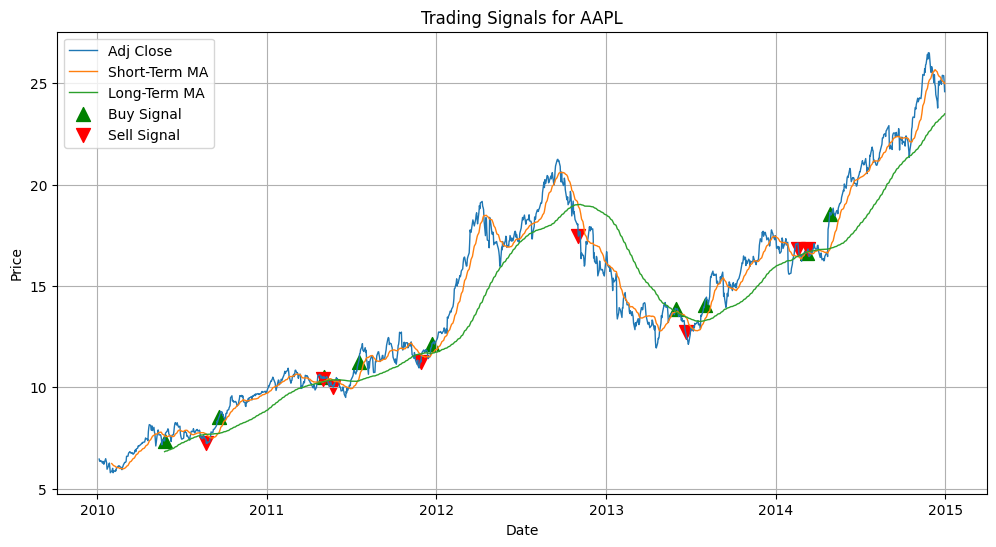

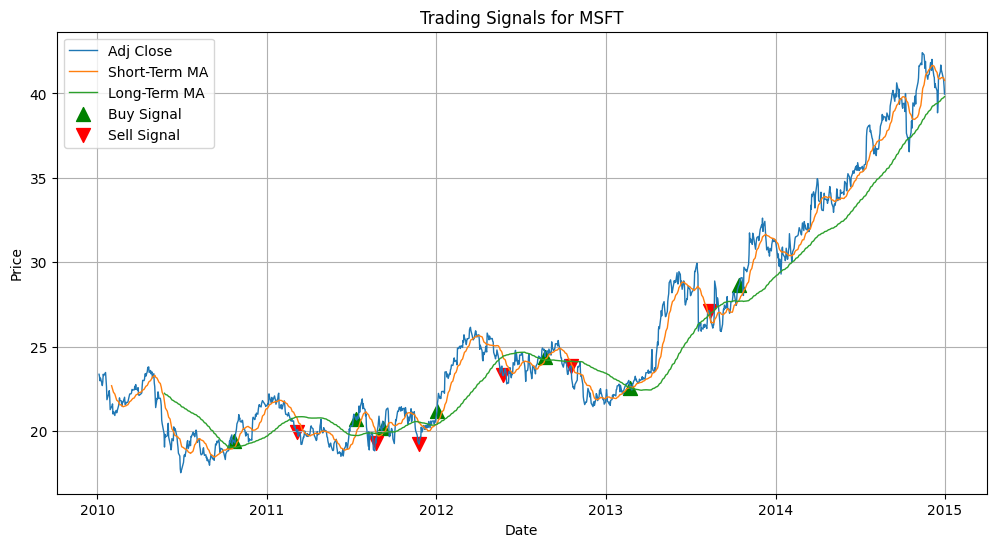

In [10]:
for ticker in tickers:
    Trading_strat.plot_trading_signals(ticker)

In [12]:

# Example usage

logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Sample data setup
initial_cash = 10000
broker = Broker(cash=initial_cash, verbose=True)
broker


Broker(cash=10000, positions={}, transaction_log=Empty DataFrame
Columns: [Date, Action, Ticker, Quantity, Price, Cash]
Index: [], entry_prices={}, verbose=True)

In [13]:
strategy = TradingStrategy(MVA)
strategy

TradingStrategy(data_MA=                          Date  Adj Close     Volume ticker   Short_MA  \
0    2010-01-04 00:00:00-05:00   6.447412  493729600   AAPL        NaN   
1    2010-01-05 00:00:00-05:00   6.458560  601904800   AAPL        NaN   
2    2010-01-06 00:00:00-05:00   6.355826  552160000   AAPL        NaN   
3    2010-01-07 00:00:00-05:00   6.344076  477131200   AAPL        NaN   
4    2010-01-08 00:00:00-05:00   6.386254  447610800   AAPL        NaN   
...                        ...        ...        ...    ...        ...   
2389 2019-12-24 00:00:00-05:00  28.350000  120820500   TSLA  24.091300   
2390 2019-12-26 00:00:00-05:00  28.729334  159508500   TSLA  24.431367   
2391 2019-12-27 00:00:00-05:00  28.691999  149185500   TSLA  24.761667   
2392 2019-12-30 00:00:00-05:00  27.646667  188796000   TSLA  25.044200   
2393 2019-12-31 00:00:00-05:00  27.888666  154285500   TSLA  25.322400   

        Long_MA  Signal  Position  
0           NaN       0       NaN  
1           NaN

In [14]:
trades = Trades(strategy=strategy, broker=broker)
trades

Trades(strategy=TradingStrategy(data_MA=                          Date  Adj Close     Volume ticker   Short_MA  \
0    2010-01-04 00:00:00-05:00   6.447412  493729600   AAPL        NaN   
1    2010-01-05 00:00:00-05:00   6.458560  601904800   AAPL        NaN   
2    2010-01-06 00:00:00-05:00   6.355826  552160000   AAPL        NaN   
3    2010-01-07 00:00:00-05:00   6.344076  477131200   AAPL        NaN   
4    2010-01-08 00:00:00-05:00   6.386254  447610800   AAPL        NaN   
...                        ...        ...        ...    ...        ...   
2389 2019-12-24 00:00:00-05:00  28.350000  120820500   TSLA  24.091300   
2390 2019-12-26 00:00:00-05:00  28.729334  159508500   TSLA  24.431367   
2391 2019-12-27 00:00:00-05:00  28.691999  149185500   TSLA  24.761667   
2392 2019-12-30 00:00:00-05:00  27.646667  188796000   TSLA  25.044200   
2393 2019-12-31 00:00:00-05:00  27.888666  154285500   TSLA  25.322400   

        Long_MA  Signal  Position  
0           NaN       0       NaN  

In [15]:
# Example usage
data_treatment = Data_treatment(data)
data_with_ma = data_treatment.compute_moving_average()

# Set up your strategy and broker
strategy = TradingStrategy(MVA)
broker = Broker(cash=10000, verbose=True)
trades = Trades(strategy=strategy, broker=broker)

strategy

TradingStrategy(data_MA=                          Date  Adj Close     Volume ticker   Short_MA  \
0    2010-01-04 00:00:00-05:00   6.447412  493729600   AAPL        NaN   
1    2010-01-05 00:00:00-05:00   6.458560  601904800   AAPL        NaN   
2    2010-01-06 00:00:00-05:00   6.355826  552160000   AAPL        NaN   
3    2010-01-07 00:00:00-05:00   6.344076  477131200   AAPL        NaN   
4    2010-01-08 00:00:00-05:00   6.386254  447610800   AAPL        NaN   
...                        ...        ...        ...    ...        ...   
2389 2019-12-24 00:00:00-05:00  28.350000  120820500   TSLA  24.091300   
2390 2019-12-26 00:00:00-05:00  28.729334  159508500   TSLA  24.431367   
2391 2019-12-27 00:00:00-05:00  28.691999  149185500   TSLA  24.761667   
2392 2019-12-30 00:00:00-05:00  27.646667  188796000   TSLA  25.044200   
2393 2019-12-31 00:00:00-05:00  27.888666  154285500   TSLA  25.322400   

        Long_MA  Signal  Position  
0           NaN       0       NaN  
1           NaN

In [18]:
# Filter the signals DataFrame for the specified date
date = '2010-05-27'
filtered_signals = signals[signals['Date'] == date]
filtered_signals

,Date,Adj Close,Volume,ticker,Short_MA,Long_MA,Signal,Position
99,2010-05-27 00:00:00-04:00,7.632595,666282400,AAPL,7.582043,6.837137,1,0.0
2614,2010-05-27 00:00:00-04:00,6.335000,94954000,AMZN,6.409400,6.464655,0,0.0
5129,2010-05-27 00:00:00-04:00,15.794734,59790400,CSCO,16.701580,16.801742,0,-1.0
7644,2010-05-27 00:00:00-04:00,12.229441,112251636,GOOGL,12.450773,13.612483,0,0.0
10159,2010-05-27 00:00:00-04:00,14.302078,83236800,INTC,14.335242,14.049064,1,0.0
12674,2010-05-27 00:00:00-04:00,19.793890,136433600,MSFT,21.525647,22.192467,0,0.0
15189,2010-05-27 00:00:00-04:00,15.551429,19626600,NFLX,14.471214,10.857314,1,0.0
17704,2010-05-27 00:00:00-04:00,0.309516,713560000,NVDA,0.314916,0.376429,0,0.0


In [17]:
# Filter the signals DataFrame for the specified date
date = '2010-02-04'
filtered_signals = signals[signals['Date'] == date]

# Convert to dictionary
market_val = dict(zip(filtered_signals['ticker'], filtered_signals['Adj Close']))

# Output the result
print(market_val)


{'AAPL': 5.785831451416016, 'AMZN': 5.796999931335449, 'CSCO': 15.454415321350098, 'GOOGL': 13.1350679397583, 'INTC': 12.413619995117188, 'MSFT': 21.00127410888672, 'NFLX': 8.619999885559082, 'NVDA': 0.3645413815975189}


In [18]:

trades_ex, ptf_val = trades.execute_trades(signals)

# Display the executed trades
display(trades_ex)
display(ptf_val)

/Users/jeandeslis/Desktop/Cours M2 203/S1/Python/Projet/pybacktestchain/src/pybacktestchain/broker.py:115: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.transaction_log = pd.concat([self.transaction_log, transaction], ignore_index=True)


,Date,Action,Ticker,Quantity,Price,Cash
0,2010-05-26 00:00:00-04:00,BUY,AAPL,271,7.354225,8007.004982
1,2010-05-26 00:00:00-04:00,BUY,CSCO,130,15.274250,6021.352478
2,2010-05-26 00:00:00-04:00,BUY,INTC,147,13.605374,4021.362451
3,2010-05-26 00:00:00-04:00,BUY,NFLX,133,14.971429,2030.162411
4,2010-05-27 00:00:00-04:00,SELL,CSCO,130,15.794737,4083.478203
...,...,...,...,...,...,...
206,2019-08-14 00:00:00-04:00,SELL,CSCO,535,42.982059,42295.082300
207,2019-08-16 00:00:00-04:00,SELL,TSLA,808,14.662667,54142.517458
208,2019-09-05 00:00:00-04:00,BUY,NVDA,4677,4.471442,33229.582183
209,2019-09-12 00:00:00-04:00,BUY,INTC,454,46.503757,12116.876288


,Date,Portfolio Value
0,2010-01-05 00:00:00-05:00,10000.000000
1,2010-01-06 00:00:00-05:00,10000.000000
2,2010-01-07 00:00:00-05:00,10000.000000
3,2010-01-08 00:00:00-05:00,10000.000000
4,2010-01-11 00:00:00-05:00,10000.000000
...,...,...
2510,2019-12-24 00:00:00-05:00,134736.274899
2511,2019-12-26 00:00:00-05:00,136135.380017
2512,2019-12-27 00:00:00-05:00,135983.390404
2513,2019-12-30 00:00:00-05:00,134426.065802


In [19]:
#executed_trades.to_csv("output.csv", index=False)

In [20]:
broker.transaction_log

,Date,Action,Ticker,Quantity,Price,Cash
0,2010-05-26 00:00:00-04:00,BUY,AAPL,271,7.354225,8007.004982
1,2010-05-26 00:00:00-04:00,BUY,CSCO,130,15.274250,6021.352478
2,2010-05-26 00:00:00-04:00,BUY,INTC,147,13.605374,4021.362451
3,2010-05-26 00:00:00-04:00,BUY,NFLX,133,14.971429,2030.162411
4,2010-05-27 00:00:00-04:00,SELL,CSCO,130,15.794737,4083.478203
...,...,...,...,...,...,...
206,2019-08-14 00:00:00-04:00,SELL,CSCO,535,42.982059,42295.082300
207,2019-08-16 00:00:00-04:00,SELL,TSLA,808,14.662667,54142.517458
208,2019-09-05 00:00:00-04:00,BUY,NVDA,4677,4.471442,33229.582183
209,2019-09-12 00:00:00-04:00,BUY,INTC,454,46.503757,12116.876288


In [31]:
# Filter the signals DataFrame for a specified date
date = '2017-06-01'
filtered_signals = signals[signals['Date'] == date]

# Convert to dictionary
market_val = dict(zip(filtered_signals['ticker'], filtered_signals['Adj Close']))
display(market_val)
display(broker.positions)

broker.get_portfolio_value(market_val)


{'AAPL': 35.766212463378906,
 'AMZN': 49.79750061035156,
 'CSCO': 25.243520736694336,
 'GOOGL': 49.236019134521484,
 'INTC': 29.91935920715332,
 'MSFT': 64.40996551513672,
 'NFLX': 162.99000549316406,
 'NVDA': 3.5643742084503174,
 'TSLA': 22.691333770751953}

{'MSFT': Position(ticker='MSFT', quantity=196, entry_price=105.2516098022461),
 'AAPL': Position(ticker='AAPL', quantity=470, entry_price=47.63334274291992),
 'NVDA': Position(ticker='NVDA', quantity=4677, entry_price=4.471442222595215),
 'INTC': Position(ticker='INTC', quantity=454, entry_price=46.50375747680664),
 'TSLA': Position(ticker='TSLA', quantity=748, entry_price=16.187332153320312)}

76670.30984973907

In [22]:
broker.positions

{'MSFT': Position(ticker='MSFT', quantity=196, entry_price=105.2516098022461),
 'AAPL': Position(ticker='AAPL', quantity=470, entry_price=47.63334274291992),
 'NVDA': Position(ticker='NVDA', quantity=4677, entry_price=4.471442222595215),
 'INTC': Position(ticker='INTC', quantity=454, entry_price=46.50375747680664),
 'TSLA': Position(ticker='TSLA', quantity=748, entry_price=16.187332153320312)}

In [23]:
#portfolio_value = trades.get_portfolio_values(executed_trades)
#portfolio_value

In [2]:
backtest = MyBacktest(
    initial_date=datetime(2010, 1, 1),
    final_date=datetime(2020, 1, 1),
    universe = ['AAPL', 'MSFT', 'GOOGL'],
    initial_cash=10000,
)

backtest.run_backtest()

INFO:root:Running backtest from 2010-01-01 00:00:00 to 2020-01-01 00:00:00.
INFO:root:Retrieving price data for universe


/Users/jeandeslis/Desktop/Cours M2 203/S1/Python/Projet/project_python_203/src/project_python_203/Data_treatment.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.data_MA['Signal'] = 0
/Users/jeandeslis/Desktop/Cours M2 203/S1/Python/Projet/project_python_203/src/project_python_203/Data_treatment.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.data_MA['Signal'] = (self.data_MA['Short_MA'] > self.data_MA['Long_MA']).astype(int)
/Users/jeandeslis/Desktop/Cours M2 203/S1/Python/Projet/project

(                        Date Action Ticker Quantity      Price          Cash
 0  2010-05-26 00:00:00-04:00    BUY   AAPL    27195   7.354225  8.000018e+05
 1  2010-08-24 00:00:00-04:00   SELL   AAPL    27195   7.228295  9.965753e+05
 2  2010-09-20 00:00:00-04:00    BUY   AAPL    23358   8.532781  7.972666e+05
 3  2010-09-27 00:00:00-04:00    BUY  GOOGL    15154  13.225580  5.968462e+05
 4  2010-10-22 00:00:00-04:00    BUY   MSFT    10755  19.424952  3.879308e+05
 ..                       ...    ...    ...      ...        ...           ...
 88 2019-03-15 00:00:00-04:00    BUY   AAPL     8509  44.632881  7.367853e+05
 89 2019-05-30 00:00:00-04:00   SELL  GOOGL     6649  55.867973  1.108251e+06
 90 2019-06-14 00:00:00-04:00   SELL   AAPL     8509  46.398399  1.503055e+06
 91 2019-06-19 00:00:00-04:00    BUY   AAPL     8225  47.633339  1.111271e+06
 92 2019-08-02 00:00:00-04:00    BUY  GOOGL     6628  59.599945  7.162428e+05
 
 [93 rows x 6 columns],
                           Date  Portf